# Assessment 2



# Part 1

In [3]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
class Particle:
    """
    Class for a particle. Each particle has a position, velocity, and a list of stored x values.
    """


    def __init__(self, pos, vel):
        """
        Initialise a particle with a position, velocity and an empty list of stored x values.
        """

        self.pos = pos
        self.vel = vel
        self.stored_x = []

In [6]:
class System:


    def __init__(self, particles):

        self.particles = particles
        self.num_particles = len(particles)
        self.times = []
        self.vel = np.zeros((self.num_particles, 3))
        self.pos = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))
        for i in range(self.num_particles):
            self.pos[i] = particles[i].pos
            self.vel[i] = particles[i].vel
    

    def force_coefficient(self, r):

        return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)


    def calculate_force(self, pos_p, pos_j):

        r = np.linalg.norm(pos_j - pos_p)
        r_hat = (pos_j - pos_p) / r
        return self.force_coefficient(r) * r_hat


    def calculate_acceleration(self, pos_p, p):

        acc = np.zeros(3)
        for j in range(self.num_particles):
            if p != j:
                acc += self.calculate_force(pos_p, self.pos[j])
        return acc


    def run(self, dt, timesteps):

        for t in range(1, timesteps + 1):
            self.times.append(t * dt)

            for p in range(self.num_particles):
                self.acc[p] = self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * dt * 0.5
            self.pos += self.vel * dt

            for p in range(self.num_particles):
                self.acc[p] = self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * dt * 0.5

            for p in range(self.num_particles):
                self.particles[p].stored_x.append(self.pos[p][0])
    

    def plot(self):

        fig, ax = plt.subplots()

        for particle in self.particles:
            ax.plot(self.times, particle.stored_x)
            ax.set_xlabel('Time')
            ax.set_ylabel('X position')


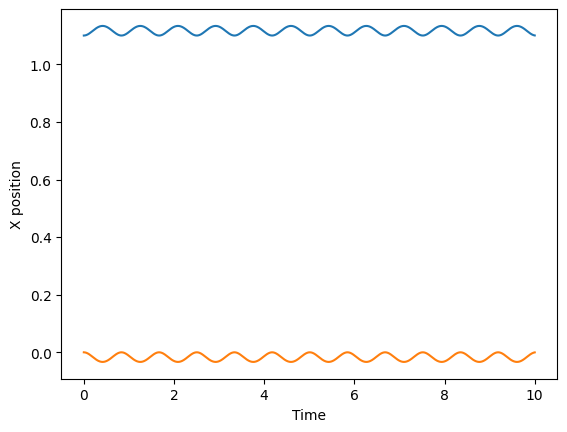

In [7]:
particle_1 = Particle(np.array([1.1, 0, 0]), np.array([0, 0, 0]))
particle_2 = Particle(np.array([0, 0, 0]), np.array([0, 0, 0]))

particles = [particle_1, particle_2]

system = System(particles)

system.run(0.001, 10000)

system.plot()

In [8]:
epsilon = 125.7 * 1.38e-23
sigma = 0.3345e-9
argon_mass = 39.948 * 1.67377e-27
tau = np.sqrt(argon_mass * sigma ** 2 / epsilon)

print("The characteristic time is:", tau)
print("The characteristic speed is:", sigma / tau)

The characteristic time is: 2.0767506276661695e-12
The characteristic speed is: 161.06892928974702


# Part 2

In [9]:
class Particle:


    def __init__(self, pos, vel):

        self.pos = pos
        self.vel = vel

In [10]:

class System:


    def __init__(self, particles, box_length, num_steps, dt):

        self.particles = particles
        self.num_particles = len(particles)

        self.dt = dt
        self.num_steps = num_steps

        self.box_length = box_length
        self.stored_pos = np.zeros((num_steps, self.num_particles, 3))
        
        self.times = []
        self.vel = np.zeros((self.num_particles, 3))
        self.pos = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))

        for i in range(self.num_particles):
            self.pos[i] = particles[i].pos
            self.vel[i] = particles[i].vel
    

    def validate_spawn(self, particle):
            
        for i in range(self.num_particles):
            if np.linalg.norm(particle.pos - self.particles[i].pos) < 1:
                return False
        return True


    def spawn_particles(self, n):

        for i in range(n):
            valid = False
            while not valid:
                pos = np.random.uniform(-self.box_length / 2, self.box_length / 2, 3)
                vel = np.zeros(3)
                particle = Particle(pos, vel)
                valid = self.validate_spawn(particle)

            self.particles.append(particle)
            self.num_particles += 1
            
        self.stored_pos = np.zeros((self.num_steps, self.num_particles, 3))
        self.pos = np.zeros((self.num_particles, 3))
        self.vel = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))

        for i in range(self.num_particles):
            self.pos[i] = self.particles[i].pos
            self.vel[i] = self.particles[i].vel


    def force_coefficient(self, r):

        return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)


    def calculate_force(self, pos_p, pos_j):

        r = np.linalg.norm(pos_j - pos_p)
        r_hat = (pos_j - pos_p) / r
        return self.force_coefficient(r) * r_hat


    def calculate_acceleration(self, pos_p, p):

        self.acc[p] = np.zeros(3)
        for j in range(self.num_particles):
            if p != j:
                self.acc[p] += self.calculate_force(pos_p, self.pos[j])


    def run(self):

        for t in range(self.num_steps):
            self.times.append(t * self.dt)

            for p in range(self.num_particles):
                self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * self.dt * 0.5
            self.pos += self.vel * self.dt

            for p in range(self.num_particles):
                self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * self.dt * 0.5

            self.vel[np.abs(self.pos) >= self.box_length / 2] *= -1
            self.pos[self.pos > self.box_length / 2] = self.box_length / 2
            self.pos[self.pos < -self.box_length / 2] = -self.box_length / 2

            self.stored_pos[t] = self.pos
    

    def plot(self):
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection="3d")

        for i in range(self.num_particles):
            x = self.stored_pos[:, i, 0]
            y = self.stored_pos[:, i, 1]
            z = self.stored_pos[:, i, 2]
            ax.plot(x, y, z, label=f"Particle {i + 1}")

        box_corners = np.array([[-self.box_length/2, -self.box_length/2, -self.box_length/2],
                        [-self.box_length/2, -self.box_length/2, self.box_length/2],
                        [-self.box_length/2, self.box_length/2, -self.box_length/2],
                        [-self.box_length/2, self.box_length/2, self.box_length/2],
                        [self.box_length/2, -self.box_length/2, -self.box_length/2],
                        [self.box_length/2, -self.box_length/2, self.box_length/2],
                        [self.box_length/2, self.box_length/2, -self.box_length/2],
                        [self.box_length/2, self.box_length/2, self.box_length/2]])

        box_edges = [[0, 1], [0, 2], [0, 4], [1, 3], [1, 5], [2, 3], [2, 6], [3, 7], [4, 5], [4, 6], [5, 7], [6, 7]]
        for edge in box_edges:
            ax.plot3D(box_corners[edge, 0], box_corners[edge, 1], box_corners[edge, 2], 'k--', alpha=0.5)

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_xlim(-self.box_length / 2, self.box_length / 2)
        ax.set_ylim(-self.box_length / 2, self.box_length / 2)
        ax.set_zlim(-self.box_length / 2, self.box_length / 2)
        ax.legend()
        

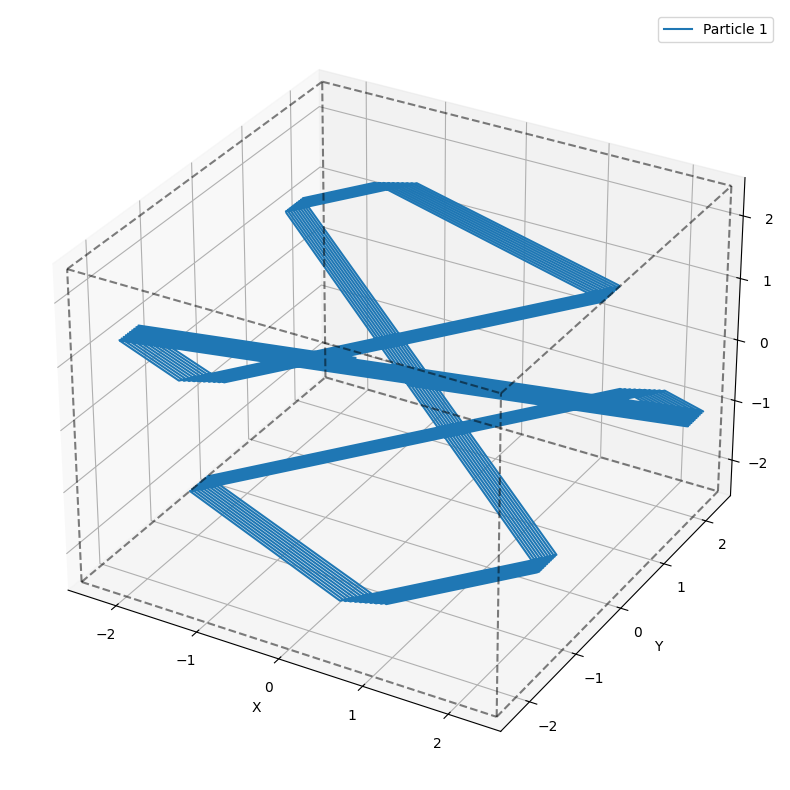

In [11]:
L = 5

particle_1 = Particle(np.array([0, 0, 0]), np.array([3, 2, -1]))
#particle_2 = Particle(np.array([4, 0, 0]), np.array([0, 3, 0]))

system = System([particle_1], L, 10000, 0.01)

#system.spawn_particles(1)

system.run()

system.plot()

# Part 3

In [83]:

class System:


    def __init__(self, particles, box_length, num_steps, dt):

        self.particles = particles
        self.num_particles = len(particles)

        self.dt = dt
        self.num_steps = num_steps

        self.box_length = box_length

        self.stored_pos = np.zeros((num_steps, self.num_particles, 3))
        self.stored_vel = np.zeros((num_steps, self.num_particles, 3))
        self.stored_flow_vel = np.zeros((num_steps, self.num_particles, 3))
        
        self.times = []
        self.vel = np.zeros((self.num_particles, 3))
        self.pos = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))

        for i in range(self.num_particles):
            self.pos[i] = particles[i].pos
            self.vel[i] = particles[i].vel
    

    def validate_spawn(self, particle):
            
        for i in range(self.num_particles):
            if np.linalg.norm(particle.pos - self.particles[i].pos) < 1:
                return False
        return True
    

    def spawn_particles(self, n):

        for i in range(n):
            valid = False
            while not valid:
                pos = np.random.uniform(-self.box_length / 2, self.box_length / 2, 3)
                vel = np.zeros(3)
                particle = Particle(pos, vel)
                valid = self.validate_spawn(particle)

            self.particles.append(particle)
            self.num_particles += 1
            
        self.stored_pos = np.zeros((self.num_steps, self.num_particles, 3))
        self.stored_vel = np.zeros((self.num_steps, self.num_particles, 3))
        self.stored_flow_vel = np.zeros(self.num_steps)
        
        self.pos = np.zeros((self.num_particles, 3))
        self.vel = np.zeros((self.num_particles, 3))
        self.acc = np.zeros((self.num_particles, 3))

        for i in range(self.num_particles):
            self.pos[i] = self.particles[i].pos
            self.vel[i] = self.particles[i].vel


    def force_coefficient(self, r):

        return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)


    def calculate_force(self, pos_p, pos_j):

        r = np.linalg.norm(pos_j - pos_p)
        r_hat = (pos_j - pos_p) / r
        return self.force_coefficient(r) * r_hat


    def calculate_acceleration(self, pos_p, p):

        self.acc[p] = np.zeros(3)
        for j in range(self.num_particles):
            if p != j:
                self.acc[p] += self.calculate_force(pos_p, self.pos[j])

    
    def calculate_temperature(self):

        sum_v2 = np.sum(self.stored_vel * self.stored_vel)
        self.avg_temperature = sum_v2 / (3 * self.num_particles * self.num_steps)


    def calculate_pressure(self):

        avg_momentum = np.sum(self.stored_flow_vel) / self.num_steps
        self.avg_pressure = 3 * avg_momentum / (self.box_length ** 2 * self.dt)


    def randomise_velocities(self, vel_mean):

        random_negatives = np.random.choice([1, -1], (self.num_particles, 3))
        self.vel = np.random.normal(vel_mean, 1, (self.num_particles, 3))
        self.vel = self.vel * random_negatives


    def run(self):

        for t in range(self.num_steps):
            self.times.append(t * self.dt)

            for p in range(self.num_particles):
                self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * self.dt * 0.5
            self.pos += self.vel * self.dt

            for p in range(self.num_particles):
                self.calculate_acceleration(self.pos[p], p)

            self.vel += self.acc * self.dt * 0.5

            self.vel[np.abs(self.pos) >= self.box_length / 2] *= -1
            self.pos[self.pos > self.box_length / 2] = self.box_length / 2
            self.pos[self.pos < -self.box_length / 2] = -self.box_length / 2

            self.stored_pos[t] = self.pos
            self.stored_vel[t] = self.vel
            
            condition_1 = self.pos[:, 0] <= 0 
            condition_2 = self.pos[:, 0] + self.vel[:, 0] * self.dt > 0
            condition = condition_1 & condition_2
            self.stored_flow_vel[t] = np.sum(self.vel[condition, 0])


    def plot(self):
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection="3d")

        for i in range(self.num_particles):
            x = self.stored_pos[:, i, 0]
            y = self.stored_pos[:, i, 1]
            z = self.stored_pos[:, i, 2]
            ax.plot(x, y, z, label=f"Particle {i + 1}")

        box_corners = np.array([[-self.box_length/2, -self.box_length/2, -self.box_length/2],
                        [-self.box_length/2, -self.box_length/2, self.box_length/2],
                        [-self.box_length/2, self.box_length/2, -self.box_length/2],
                        [-self.box_length/2, self.box_length/2, self.box_length/2],
                        [self.box_length/2, -self.box_length/2, -self.box_length/2],
                        [self.box_length/2, -self.box_length/2, self.box_length/2],
                        [self.box_length/2, self.box_length/2, -self.box_length/2],
                        [self.box_length/2, self.box_length/2, self.box_length/2]])

        box_edges = [[0, 1], [0, 2], [0, 4], [1, 3], [1, 5], [2, 3], [2, 6], [3, 7], [4, 5], [4, 6], [5, 7], [6, 7]]
        for edge in box_edges:
            ax.plot3D(box_corners[edge, 0], box_corners[edge, 1], box_corners[edge, 2], 'k--', alpha=0.5)

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_xlim(-self.box_length / 2, self.box_length / 2)
        ax.set_ylim(-self.box_length / 2, self.box_length / 2)
        ax.set_zlim(-self.box_length / 2, self.box_length / 2)
        ax.legend()

    
    def measure(self, velocity):

        self.randomise_velocities(velocity)
        self.run()
        self.calculate_temperature()
        self.calculate_pressure()

        return self.avg_temperature, self.avg_pressure

In [89]:
num_tests = 10

velocities = np.random.uniform(0.1, 5, (num_tests, 3))
box_lengths = np.linspace(5, 10, num_tests)

temperatures = np.zeros((num_tests, num_tests))
pressures = np.zeros((num_tests, num_tests))

for i, velocity in enumerate(velocities):
    for j, box_length in enumerate(box_lengths):
        system = System([], box_length, 1000, 0.01)
        system.spawn_particles(10)
        temperature, pressure = system.measure(velocity)
        temperatures[i, j] = temperature
        pressures[i, j] = pressure

print(temperatures)
print(pressures)


[[13.09660878 12.39349845 14.65863976 10.07835209 10.9279429   9.91818461
  11.50684541 11.86987259 13.98028451 11.86074825]
 [ 6.07775479  8.52159626  7.6273617   9.59241242  7.63216325  9.94169001
   7.41735554  6.43608626  7.09453911  8.30850621]
 [13.39948984 11.91589562 14.22805722 13.40023489 14.11410758 12.65420283
  11.44285872 13.02536059 13.59131182 14.35097451]
 [ 1.99647604  2.08926522  2.46321478  2.74995939  2.65978204  2.0042198
   1.88800028  1.44867371  2.17732471  2.16240836]
 [ 4.41889482  5.87551375  5.13194159  6.02727524  5.76841015  4.36815872
   4.3659934   3.81173575  6.04716169  5.49968762]
 [11.47149812 11.10043268 10.59402284  9.63250146 11.92102069  9.90331753
   9.50048367 10.61629666 10.14536968  8.88502259]
 [12.16528827 12.07126311 11.7478044   9.98982506 10.86957715 12.3939477
   9.90603934 11.47544842 10.79444205 12.26647451]
 [12.53953485 15.2745662  11.77131481 18.71476824 12.50239551 12.2775014
  13.29263495 14.2232679  15.68347723 14.17560453]
 [1

Text(0.5, 1.0, 'Pressure vs Temperature')

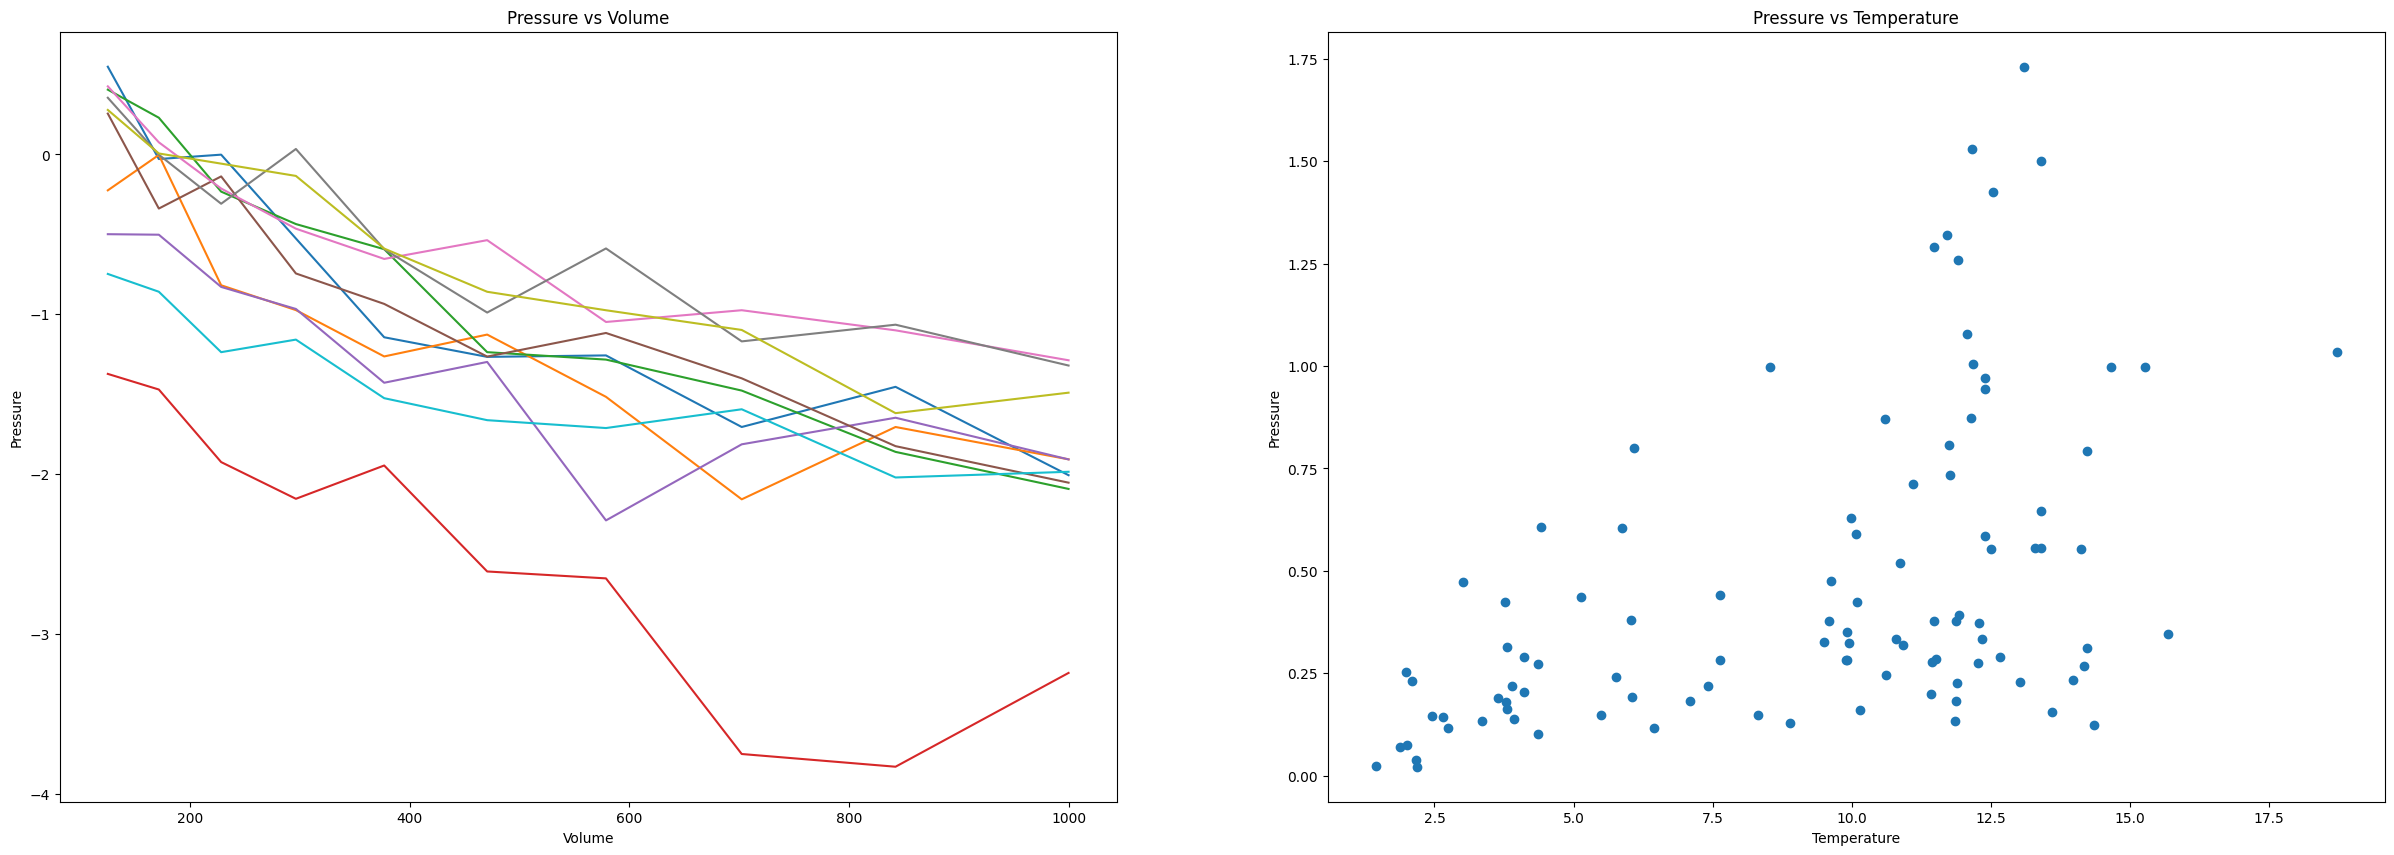

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
for i in range(num_tests):
    ax[0].plot(box_lengths ** 3, np.log(pressures[i]))

ax[0].set_xlabel("Volume")
ax[0].set_ylabel("Pressure")
ax[0].set_title("Pressure vs Volume")

flattened_temperatures = temperatures.flatten()
flattened_pressures = pressures.flatten()

ax[1].scatter(flattened_temperatures, flattened_pressures)

ax[1].set_xlabel("Temperature")
ax[1].set_ylabel("Pressure")
ax[1].set_title("Pressure vs Temperature")